In [1]:
import pandas as pd
import numpy as np
from math import sqrt

In [3]:
df = pd.read_csv(r"C:\Users\renac\Downloads\NUS\Y3S1\DSA3101\project\vehicle_detector_accuracy.csv")

### RMSE (with checkpoint cameras)

In [4]:
test = df["Vehicle_Count"]
actual = df["True_Vehicle_Count"]
RMSE_checkpoint = sqrt(np.square(np.subtract(actual,test)).mean())

### RMSE (without checkpoint cameras)

In [5]:
checkpoint_id = [2701, 2702, 4703, 4713]
df1 = df[~df["Camera_Id"].isin(checkpoint_id)]

In [6]:
test_1 = df1["Vehicle_Count"]
actual_1 = df1["True_Vehicle_Count"]
RMSE_no_checkpoint = sqrt(np.square(np.subtract(actual_1,test_1)).mean())

In [7]:
result_df = pd.DataFrame.from_dict({"Data": ["no checkpoint cameras", "with checkpoint cameras"], "RMSE": [RMSE_no_checkpoint, RMSE_checkpoint]})

In [8]:
result_df

,Data,MSE
0,no checkpoint cameras,5.170851
1,with checkpoint cameras,6.800254


### Confusion Matrix (with checkpoint cameras)

In [8]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [9]:
test_jam = df["Jam"]
actual_jam = df["True_Traffic_Condition"]

In [18]:
confusion_matrix = metrics.confusion_matrix(actual_jam, test_jam)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=["No Jam", "Jam"])

In [ ]:
cm_display.plot()
plt.xlabel('Predicted Traffic Condition')
plt.ylabel('True Traffic Condition')
plt.title('Jam Confusion Matrix (with checkpoint cameras)')
plt.show()
# plt.savefig('jam_confusion_matrix.png')

### Confusion Matrix (without checkpoint cameras)

In [21]:
test_jam_1 = df1["Jam"]
actual_jam_1 = df1["True_Traffic_Condition"]

In [22]:
confusion_matrix_1 = metrics.confusion_matrix(actual_jam_1, test_jam_1)
cm_display_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1, display_labels=["No Jam", "Jam"])

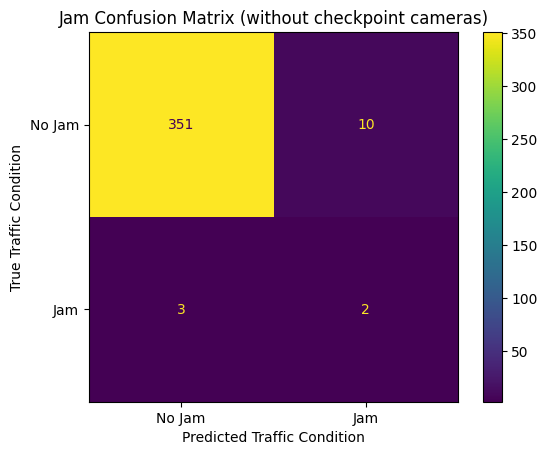

In [23]:
cm_display_1.plot()
plt.xlabel('Predicted Traffic Condition')
plt.ylabel('True Traffic Condition')
plt.title('Jam Confusion Matrix (without checkpoint cameras)')
plt.show()
# plt.savefig('jam_confusion_matrix.png')